Epoch 0: Loss = 0.6528
Epoch 100: Loss = 0.2987
Epoch 200: Loss = 0.1799
Epoch 300: Loss = 0.1234
Epoch 400: Loss = 0.0931


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


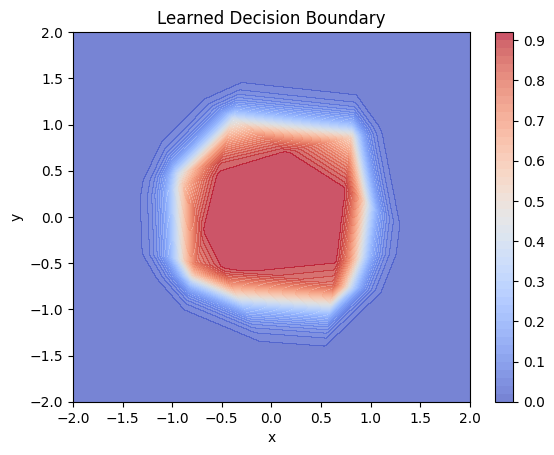

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate data
def generate_data(n=1000, radius=1.0):
    X = torch.rand(n, 2) * 4 - 2  # Random points in range [-2, 2]
    y = (X[:, 0]**2 + X[:, 1]**2 < radius**2).float()  # Inside circle = 1, else 0
    return X, y

# Define a simple neural network with 1 hidden layer + ReLU
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 10),  # input: x, y → 10 hidden units
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()       # output probability between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, X, y, epochs=500, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        y_pred = model(X).squeeze()
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Plot decision boundary
def plot_decision_boundary(model):
    grid_x, grid_y = torch.meshgrid(torch.linspace(-2, 2, 200), torch.linspace(-2, 2, 200))
    grid = torch.stack((grid_x.flatten(), grid_y.flatten()), dim=1)
    with torch.no_grad():
        preds = model(grid).reshape(200, 200)
    plt.contourf(grid_x, grid_y, preds, levels=50, cmap="coolwarm", alpha=0.7)
    plt.colorbar()
    plt.title("Learned Decision Boundary")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Run the pipeline
X, y = generate_data()
model = CircleClassifier()
train_model(model, X, y)
plot_decision_boundary(model)